In [19]:
#!pip install cython --user

  Using cached https://files.pythonhosted.org/packages/9e/cc/60984d76cde8cb76d7a897fc0dfb316c6c2f8c753cdf468a9d5773376b84/Cython-0.29.16-cp36-cp36m-manylinux1_x86_64.whl
You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
#!pip install pycocotools --user

  Using cached https://files.pythonhosted.org/packages/96/84/9a07b1095fd8555ba3f3d519517c8743c2554a245f9476e5e39869f948d2/pycocotools-2.0.0.tar.gz
  Running setup.py bdist_wheel for pycocotools ... done
  Stored in directory: /nfs/home/hama2386/.cache/pip/wheels/dc/e6/36/0e1ae88c868eb42d3f92181b1c9bbd0b217a7ec3da6bd62e55
Successfully built pycocotools
You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import torchvision.datasets as dataset

DATAPATH_TRAIN = "coco_dataset/train2017"
DATAPATH_TR_JSON = "coco_dataset/annotations/instances_train2017.json"

coco_train = dataset.CocoDetection(root = DATAPATH_TRAIN,annFile = DATAPATH_TR_JSON)

loading annotations into memory...
Done (t=13.04s)
creating index...
index created!


In [2]:
print('Number of samples: ', len(coco_train))

Number of samples:  118287


[53.01, 356.49, 132.03, 55.19]


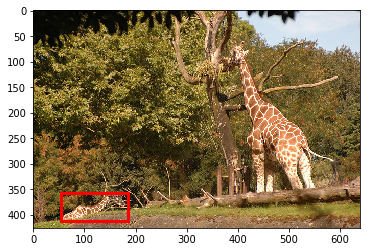

[{'segmentation': [[437.52, 353.33, 437.87, 326.98, 433.65, 306.26, 427.33, 287.29, 427.33, 279.56, 424.52, 266.21, 417.85, 255.68, 417.49, 248.65, 428.38, 234.95, 429.09, 223.71, 426.28, 211.77, 416.44, 192.45, 415.74, 191.05, 414.33, 182.27, 414.68, 180.51, 413.98, 170.32, 412.58, 168.22, 411.87, 165.41, 410.82, 149.6, 405.9, 121.15, 400.28, 107.45, 392.56, 108.85, 386.58, 101.13, 385.88, 99.72, 385.53, 92.7, 386.58, 88.48, 385.88, 84.62, 386.94, 81.1, 392.91, 68.11, 395.01, 60.03, 396.07, 60.03, 398.88, 65.65, 398.53, 68.46, 399.58, 70.57, 404.5, 68.81, 408.01, 61.79, 408.71, 61.08, 413.28, 62.84, 409.77, 73.38, 409.77, 77.24, 414.33, 81.81, 418.55, 80.75, 424.17, 77.59, 424.52, 80.4, 418.9, 86.72, 413.98, 93.05, 432.25, 127.82, 442.78, 157.68, 453.32, 172.43, 465.62, 179.46, 482.48, 198.42, 497.23, 214.23, 519.71, 226.17, 535.87, 251.81, 542.19, 268.67, 543.59, 272.89, 562.21, 285.18, 590.31, 293.96, 599.44, 297.12, 600.5, 321.01, 589.26, 318.9, 585.74, 313.98, 582.93, 304.5, 578.7

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

img, target = coco_train[1]
bbox = target[1]["bbox"]
print(bbox)
plt.imshow(img)
ax = plt.gca()
rect = Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=3,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()
print(target)

In [4]:
data = coco_train[0]
print(data)
print()
print(data[0])
print()
print(data[1])

(<PIL.Image.Image image mode=RGB size=640x480 at 0x7F1C4F811390>, [{'segmentation': [[500.49, 473.53, 599.73, 419.6, 612.67, 375.37, 608.36, 354.88, 528.54, 269.66, 457.35, 201.71, 420.67, 187.69, 389.39, 192.0, 19.42, 360.27, 1.08, 389.39, 2.16, 427.15, 20.49, 473.53]], 'area': 120057.13925, 'iscrowd': 0, 'image_id': 9, 'bbox': [1.08, 187.69, 611.59, 285.84], 'category_id': 51, 'id': 1038967}, {'segmentation': [[357.03, 69.03, 311.73, 15.1, 550.11, 4.31, 631.01, 62.56, 629.93, 88.45, 595.42, 185.53, 513.44, 230.83, 488.63, 232.99, 437.93, 190.92, 429.3, 189.84, 434.7, 148.85, 410.97, 121.89, 359.19, 74.43, 358.11, 65.8]], 'area': 44434.751099999994, 'iscrowd': 0, 'image_id': 9, 'bbox': [311.73, 4.31, 319.28, 228.68], 'category_id': 51, 'id': 1039564}, {'segmentation': [[249.6, 348.99, 267.67, 311.72, 291.39, 294.78, 304.94, 294.78, 326.4, 283.48, 345.6, 273.32, 368.19, 269.93, 385.13, 268.8, 388.52, 257.51, 393.04, 250.73, 407.72, 240.56, 425.79, 230.4, 441.6, 229.27, 447.25, 237.18, 

In [5]:
640*480

307200

In [ ]:
from tqdm import tqdm

area_dist = []

for img,target in tqdm(coco_train):
    for obj in target:
        area_dist.append(obj["area"])

  2%|▏         | 2904/118287 [00:35<23:06, 83.19it/s] 

In [ ]:
plt.hist(area_dist, bins=100, range=(min(area_dist),307200))
plt.show()

In [ ]:
print(max(area_dist))

In [ ]:
len(area_dist)

In [ ]:
area_dist.sort()
area_dist[len(area_dist)//10]

In [ ]:
import numpy as np

np.sqrt(np.mean(area_dist))

In [ ]:
img

In [ ]:
np_img = np.array(img)
plt.imshow(np_img)
plt.show()
print(np_img)

In [ ]:
from skimage.transform import resize
from skimage import img_as_ubyte, img_as_bool
#640(col),480(row)

def sqrBoundingBox(img,bbox,ratio=1):
    #PADDING = 50
    
    larger = 1/ratio - 1
    
    ROW_LOWER_BOUND = 0
    ROW_UPPER_BOUND = img.shape[0]
    COL_LOWER_BOUND = 0
    COL_UPPER_BOUND = img.shape[1]
    
    minr = max(bbox[1] - (bbox[1]*larger)//2 , 0)
    maxr = min(bbox[1]+bbox[3] + ((bbox[1]+bbox[3])*larger)//2 , 480)
    minc = max(bbox[0] - (bbox[0]*larger)//2 , 0)
    maxc = min(bbox[0]+bbox[2] + ((bbox[0]+bbox[2])*larger)//2 , 640)
    
    bbox_row_length = maxr-minr
    bbox_col_length = maxc-minc
    
    if bbox_row_length < bbox_col_length:
        more = (bbox_col_length - bbox_row_length)//2
        minr = minr - more
        maxr = maxr + more
    else:
        more = (bbox_row_length - bbox_col_length)//2
        minc = minc - more
        maxc = maxc + more
    
    if maxr-minr > ROW_UPPER_BOUND:
        minr = 0
        maxr = ROW_UPPER_BOUND
    else:
        if minr < ROW_LOWER_BOUND:
            maxr = maxr + abs(minr)
            minr = ROW_LOWER_BOUND
        
        if maxr > ROW_UPPER_BOUND:
            minr = minr - abs(maxr-ROW_UPPER_BOUND)
            maxr = ROW_UPPER_BOUND
        
    if maxc-minc > COL_UPPER_BOUND:
        minc = 0 
        maxc = COL_UPPER_BOUND
    else:
        if minc < COL_LOWER_BOUND:
            maxc = maxc + abs(minc)
            minc = COL_LOWER_BOUND
        if maxc > COL_UPPER_BOUND:
            minc = minc - abs(maxc-COL_UPPER_BOUND)
            maxc = COL_UPPER_BOUND
    

    minr = int(minr)
    maxr = int(maxr)
    minc = int(minc)
    maxc = int(maxc)
    return img[minr:maxr, minc:maxc]
    
        

In [ ]:

print(bbox)
#print(np_img)
plt.imshow(sqrBoundingBox(np_img,bbox,0.5))
plt.show()
plt.imshow(sqrBoundingBox(np_img,bbox,1))
plt.show()
plt.imshow(np_img[318:,53:185])
plt.show()
np_img.shape

In [ ]:
sqrBoundingBox(np_img,bbox,0.25)
sqrBoundingBox(np_img,bbox,0.5)
sqrBoundingBox(np_img,bbox,0.75)
sqrBoundingBox(np_img,bbox,1)

In [ ]:
def temp_func(img,target):
    
    for obj in target:
        

In [125]:
from multiprocessing import Pool

classes = []

pool 

for img,target in tqdm(coco_train):
    for obj in target:
        classes.append(obj["category_id"])

 57%|█████▋    | 67125/118287 [05:59<04:31, 188.42it/s]

KeyboardInterrupt: 

In [129]:
import os

os.mkdir("cropped_coco")

In [131]:
new_path = "cropped_coco"
dir_name = ["25","50","75","100"]
for name in dir_name:
    os.mkdir(os.path.join(new_path,name))

In [128]:
print(list(set(classes)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]


In [133]:
for name in dir_name:
    for category in list(set(classes)):
        os.mkdir(os.path.join(new_path,name,str(category)))

In [7]:
from PIL import Image
import os

def image_cutter(data):
    new_path = "cropped_coco/train"
    dir_name = ["25","50","75","100"]
    
    np_img = np.array(data[0])
    for obj in data[1]:
        bbox = obj["bbox"]
        obj_id = str(obj["id"])
        cat_id = str(obj["category_id"])
        cropped_img_100 = sqrBoundingBox(np_img,bbox,1)
        #cropped_img_75 = sqrBoundingBox(np_img,bbox,0.75)
        cropped_img_50 = sqrBoundingBox(np_img,bbox,0.5)
        #cropped_img_25 = sqrBoundingBox(np_img,bbox,0.25)
        
        #print(bbox,obj_id,cat_id)
        
        try:
            img1 = Image.fromarray(cropped_img_100)
        except:
            print("sad")
        #img2 = Image.fromarray(cropped_img_75)
        try:
            img3 = Image.fromarray(cropped_img_50)
        except:
            print("sad")
        #img4 = Image.fromarray(cropped_img_25)
        
        img1.save(os.path.join(new_path,"100",cat_id,obj_id+".png"))
        #img2.save(os.path.join(new_path,"75",cat_id,obj_id+".png"))
        img3.save(os.path.join(new_path,"50",cat_id,obj_id+".png"))
        #img4.save(os.path.join(new_path,"25",cat_id,obj_id+".png"))
        

        

In [153]:
image_cutter(coco_train[1])

In [ ]:
from multiprocessing import Pool
from tqdm import tqdm
import numpy as np

with Pool(processes=40) as p:
    with tqdm(total=len(coco_train)) as pbar:
        for i,_ in enumerate(p.imap_unordered(image_cutter,coco_train)):
            pbar.update()

## cropped_coco analysis

In [1]:
import os 

path = "cropped_coco/train/100"

file_list = os.listdir(path)
file_list.sort()

number_of_img = []

for class_dir in file_list:
    img_list = os.listdir(os.path.join(path,class_dir))
    number_of_img.append(len(img_list))

FileNotFoundError: [Errno 2] No such file or directory: 'cropped_coco/train/100'

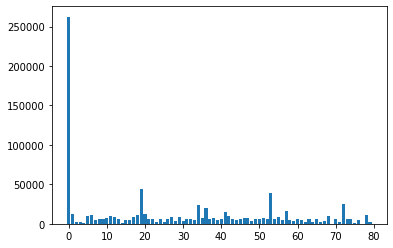

In [2]:
import matplotlib.pyplot as plt 

plt.bar(range(len(number_of_img)),number_of_img)
plt.show()

In [3]:
import numpy as np

np.array(number_of_img).mean()

10750.0125

In [4]:
print(np.array(number_of_img).min())
print(np.array(number_of_img).max())

198
262465


In [5]:
import cv2
from tqdm import tqdm

path = "cropped_coco/train/100"

img_dim_arr = []

for class_dir in file_list:
    img_list = os.listdir(os.path.join(path,class_dir))
    temp = []
    for img_file in tqdm(img_list):
        img = cv2.imread(os.path.join(path,class_dir,img_file))
        temp.append(img.shape)
    img_dim_arr.append(temp)

100%|██████████| 1954/1954 [00:01<00:00, 1164.90it/s]


In [6]:
print(img_dim_arr[0][0])

(119, 119, 3)


In [7]:
img_mean_arr = []

for img_class in img_dim_arr:
    temp = []
    for imgs in tqdm(img_class):
        temp.append((imgs[0]+imgs[1])//2)
    img_mean_arr.append(temp)

100%|██████████| 1954/1954 [00:00<00:00, 1487417.43it/s]


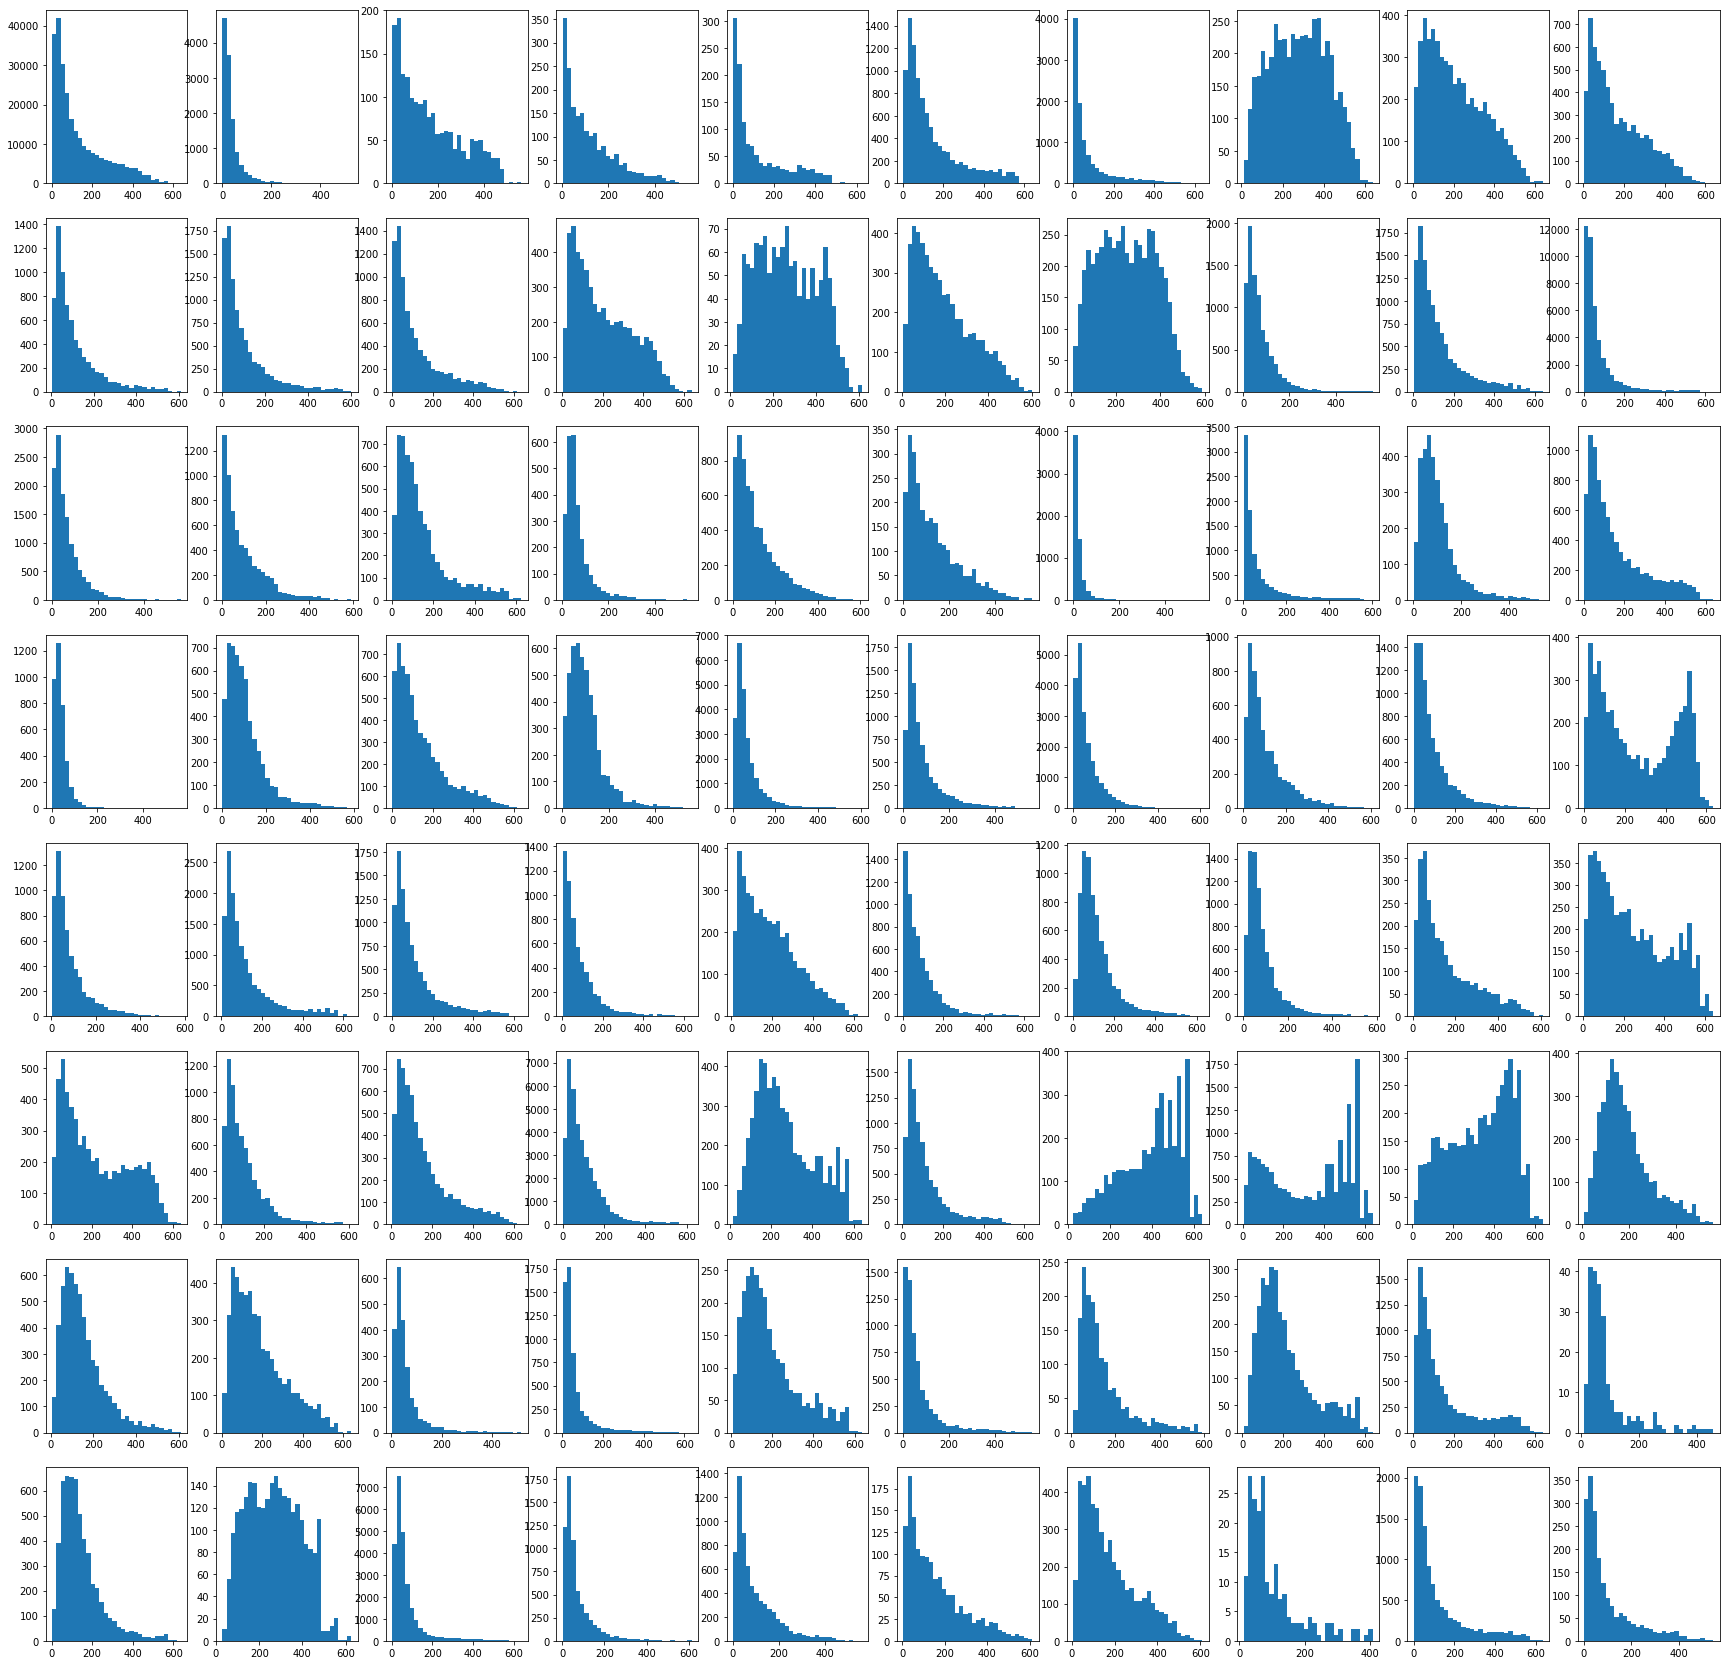

In [8]:
plt.figure(figsize=(30,30))
for i in range(1,81):
    plt.subplot(8,10,i)
    plt.hist(img_mean_arr[i-1],bins=30)
plt.show()

In [9]:
num=0
for i in img_mean_arr:
    dims = np.array(i)
    dims.sort()
    print(num,dims[int(len(dims)*0.20):])
    num = num+1

0 [ 29  29  29 ... 639 639 640]
1 [ 12  12  12 ... 521 523 525]
2 [ 41  42  42 ... 528 559 560]
3 [ 25  25  26 ... 512 528 560]
4 [ 19  19  19 ... 539 558 626]
5 [ 38  38  38 ... 637 638 638]
6 [ 12  12  12 ... 637 638 639]
7 [146 146 146 ... 612 621 638]
8 [ 76  76  76 ... 631 634 638]
9 [ 52  52  52 ... 610 629 639]
10 [ 32  32  32 ... 609 610 610]
11 [ 24  24  24 ... 592 599 601]
12 [ 29  29  29 ... 609 613 637]
13 [ 66  66  66 ... 621 627 639]
14 [128 129 129 ... 603 612 613]
15 [ 71  71  71 ... 600 601 603]
16 [122 122 123 ... 580 584 588]
17 [ 24  24  24 ... 553 554 560]
18 [ 34  34  34 ... 638 638 639]
19 [ 19  19  19 ... 628 628 638]
20 [ 21  21  21 ... 558 560 560]
21 [ 21  21  21 ... 578 584 591]
22 [ 48  48  48 ... 610 615 624]
23 [ 29  29  29 ... 537 538 559]
24 [ 33  33  33 ... 558 579 607]
25 [ 37  37  37 ... 545 560 560]
26 [  7   7   7 ... 544 545 561]
27 [ 11  11  11 ... 557 565 601]
28 [ 43  43  43 ... 511 511 540]
29 [ 44  44  44 ... 631 634 637]
30 [ 16  16  16 ... 

In [10]:
temp = []
for i in img_mean_arr:
    for j in i:
        if j>32:
            temp.append(j)

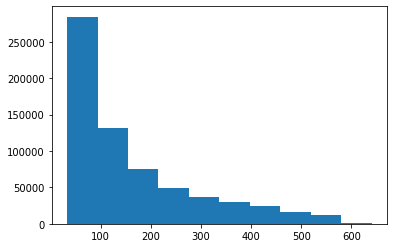

661129


In [11]:
plt.hist(temp)
plt.show()
print(len(temp))

In [12]:
print(len(np.array(temp)[np.array(temp)>50]))

548002


  0%|          | 0/262465 [00:00<?, ?it/s]

(50, 49, 3)


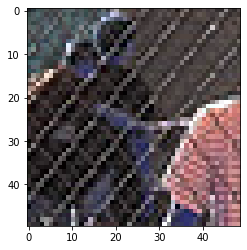

  0%|          | 0/12884 [00:00<?, ?it/s]

(50, 49, 3)


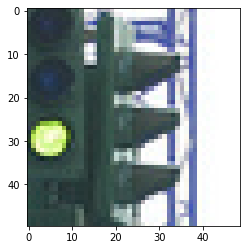

 31%|███       | 569/1865 [00:00<00:01, 821.26it/s]

(50, 48, 3)


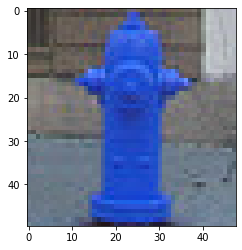

  0%|          | 0/1983 [00:00<?, ?it/s]

(50, 49, 3)


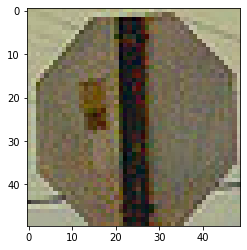

  8%|▊         | 103/1285 [00:00<00:01, 1029.58it/s]

(50, 49, 3)


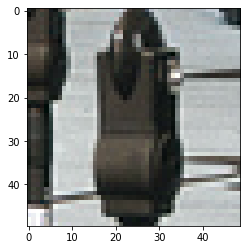

  0%|          | 0/9838 [00:00<?, ?it/s]

(50, 50, 3)


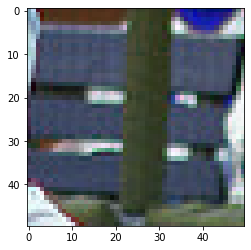

  0%|          | 0/10806 [00:00<?, ?it/s]

(50, 48, 3)


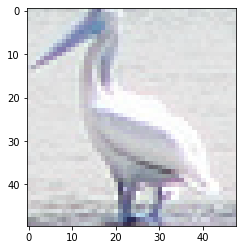

 25%|██▍       | 1179/4768 [00:03<00:09, 370.90it/s]

(50, 49, 3)


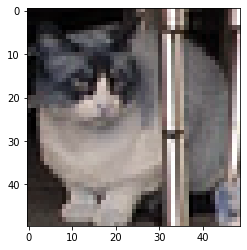

  0%|          | 0/5508 [00:00<?, ?it/s]

(50, 52, 3)


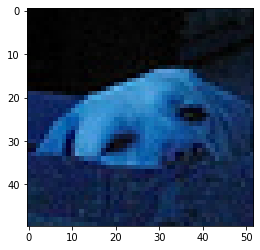

  5%|▍         | 322/6587 [00:00<00:07, 807.48it/s]

(50, 50, 3)


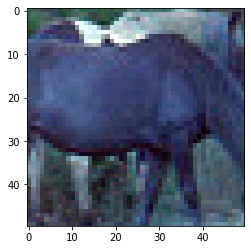

  0%|          | 0/7113 [00:00<?, ?it/s]

(50, 50, 3)


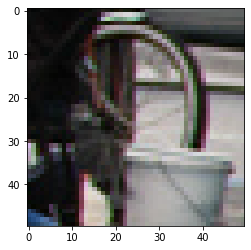

  0%|          | 0/9509 [00:00<?, ?it/s]

(50, 51, 3)


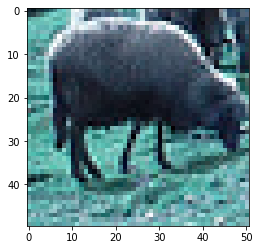

  0%|          | 0/8147 [00:00<?, ?it/s]

(50, 50, 3)


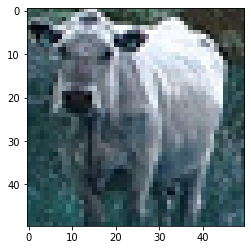

  4%|▍         | 243/5513 [00:00<00:08, 603.43it/s]

(50, 49, 3)


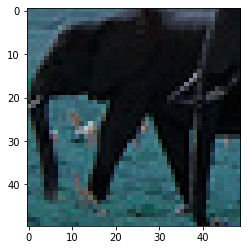

  0%|          | 0/5303 [00:00<?, ?it/s]

(50, 50, 3)


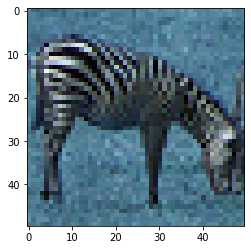

 21%|██▏       | 1098/5131 [00:02<00:08, 490.62it/s]

(50, 51, 3)


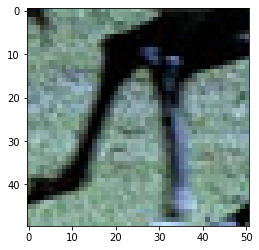

  0%|          | 0/8720 [00:00<?, ?it/s]

(50, 48, 3)


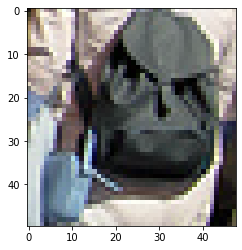

  1%|          | 139/11431 [00:00<00:08, 1374.35it/s]

(50, 51, 3)


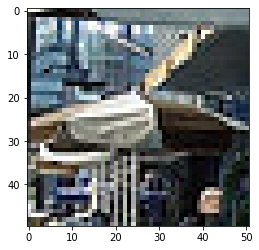

  0%|          | 0/43867 [00:00<?, ?it/s]

(50, 49, 3)


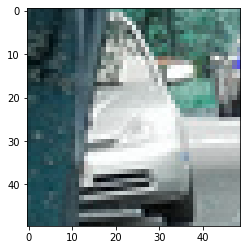

  0%|          | 0/12354 [00:00<?, ?it/s]

(50, 49, 3)


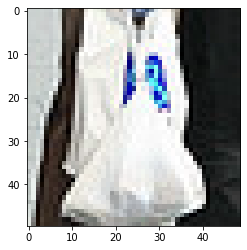

  0%|          | 0/6496 [00:00<?, ?it/s]

(50, 49, 3)


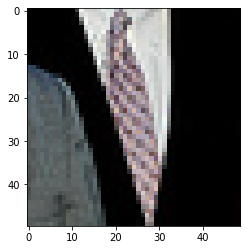

  0%|          | 0/6192 [00:00<?, ?it/s]

(50, 49, 3)


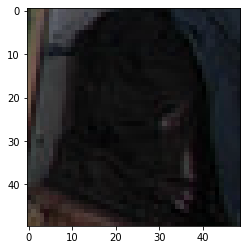

  0%|          | 0/2682 [00:00<?, ?it/s]

(50, 52, 3)


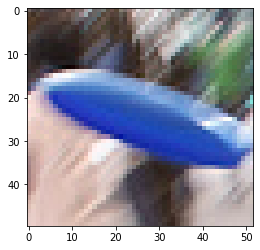

  2%|▏         | 134/6646 [00:00<00:04, 1334.70it/s]

(50, 51, 3)


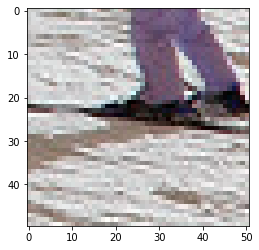

  3%|▎         | 81/2685 [00:00<00:03, 775.95it/s]

(50, 51, 3)


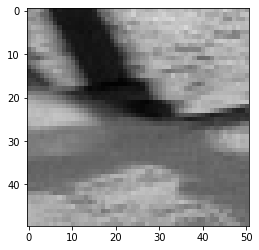

  0%|          | 0/6347 [00:00<?, ?it/s]

(50, 52, 3)


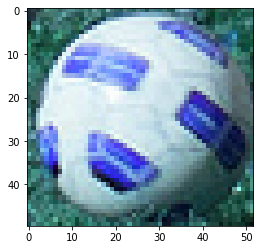

  3%|▎         | 289/9076 [00:00<00:03, 2877.36it/s]

(50, 49, 3)


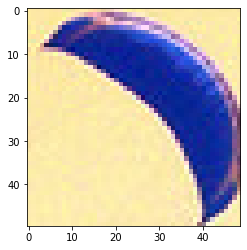

  0%|          | 0/3276 [00:00<?, ?it/s]

(50, 51, 3)


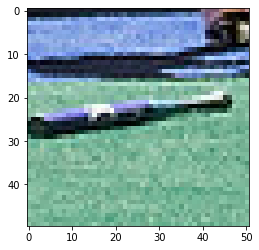

  0%|          | 0/8725 [00:00<?, ?it/s]

(50, 48, 3)


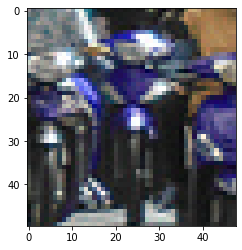

  0%|          | 0/3747 [00:00<?, ?it/s]

(50, 48, 3)


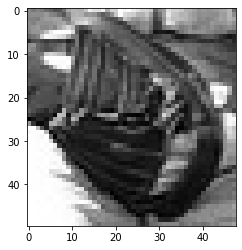

  0%|          | 0/5543 [00:00<?, ?it/s]

(50, 49, 3)


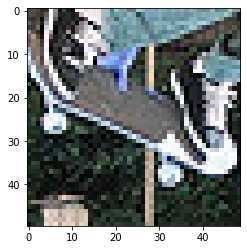

  0%|          | 0/6126 [00:00<?, ?it/s]

(50, 50, 3)


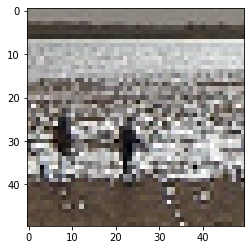

  4%|▍         | 182/4812 [00:00<00:02, 1816.62it/s]

(50, 50, 3)


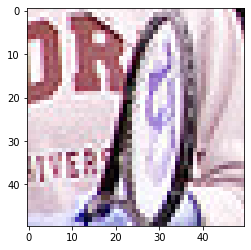

  0%|          | 0/24342 [00:00<?, ?it/s]

(50, 48, 3)


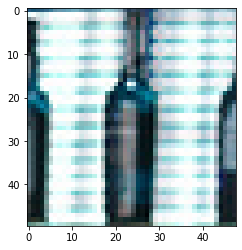

  0%|          | 0/7913 [00:00<?, ?it/s]

(50, 50, 3)


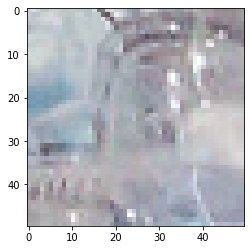

  0%|          | 0/20650 [00:00<?, ?it/s]

(50, 52, 3)


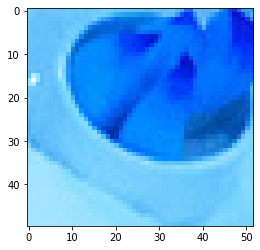

  0%|          | 0/5479 [00:00<?, ?it/s]

(50, 52, 3)


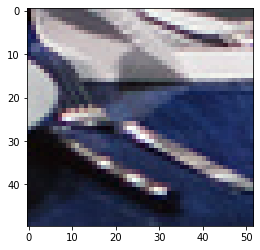

  0%|          | 0/7770 [00:00<?, ?it/s]

(50, 49, 3)


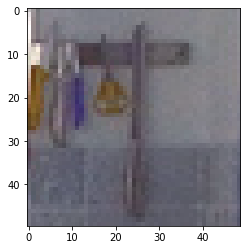

  4%|▍         | 227/5135 [00:00<00:13, 358.16it/s]

(50, 48, 3)


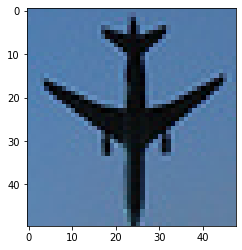

  0%|          | 0/6165 [00:00<?, ?it/s]

(50, 50, 3)


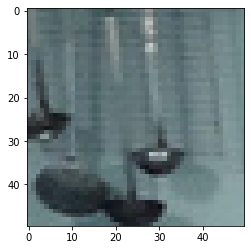

  2%|▏         | 254/14358 [00:00<00:11, 1231.77it/s]

(50, 50, 3)


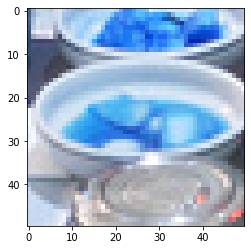

  2%|▏         | 167/9458 [00:00<00:05, 1647.69it/s]

(50, 49, 3)


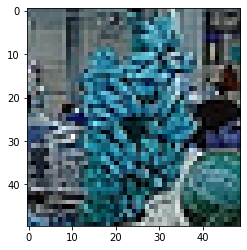

  0%|          | 0/5851 [00:00<?, ?it/s]

(50, 49, 3)


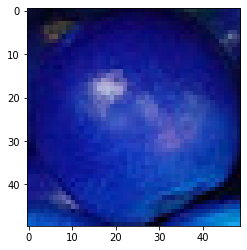

  9%|▉         | 414/4373 [00:00<00:05, 671.99it/s]

(50, 51, 3)


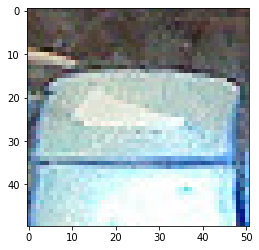

  0%|          | 0/6399 [00:00<?, ?it/s]

(50, 49, 3)


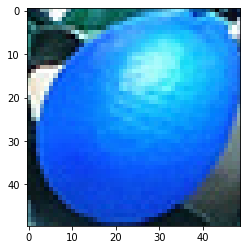

  2%|▏         | 150/7308 [00:00<00:04, 1496.36it/s]

(50, 50, 3)


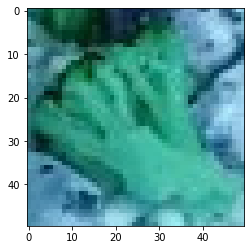

  0%|          | 0/7852 [00:00<?, ?it/s]

(50, 49, 3)


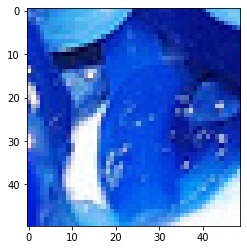

  0%|          | 0/2918 [00:00<?, ?it/s]

(50, 52, 3)


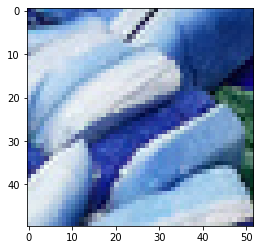

  3%|▎         | 148/5821 [00:00<00:11, 473.38it/s]

(50, 52, 3)


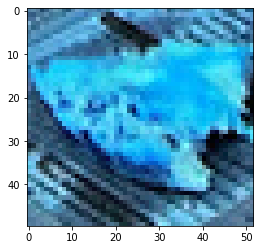

  0%|          | 0/6069 [00:00<?, ?it/s]

(50, 52, 3)


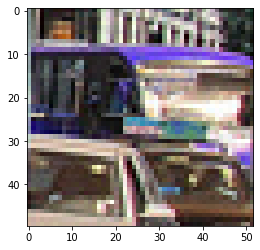

  0%|          | 0/7179 [00:00<?, ?it/s]

(50, 51, 3)


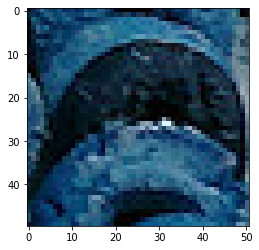

  0%|          | 0/6353 [00:00<?, ?it/s]

(50, 51, 3)


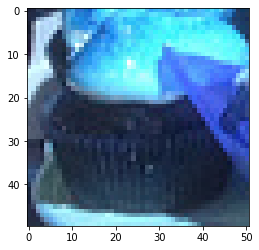

  0%|          | 0/38491 [00:00<?, ?it/s]

(50, 51, 3)


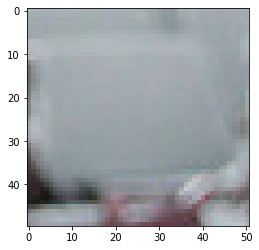

 20%|██        | 1180/5779 [00:02<00:10, 422.50it/s]

(50, 50, 3)


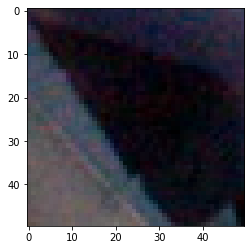

  2%|▏         | 137/8652 [00:00<00:06, 1329.71it/s]

(50, 50, 3)


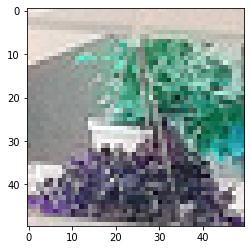

 36%|███▌      | 1510/4192 [00:06<00:10, 250.79it/s]

(50, 50, 3)


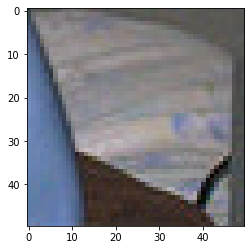

  6%|▋         | 1019/15714 [00:03<00:57, 254.03it/s]

(50, 50, 3)


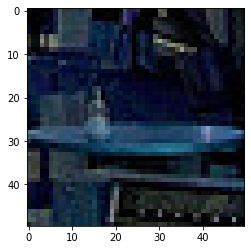

 20%|██        | 920/4571 [00:02<00:12, 298.61it/s]

(50, 49, 3)


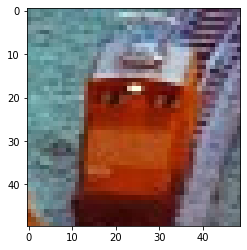

  8%|▊         | 351/4157 [00:00<00:04, 867.92it/s]

(50, 51, 3)


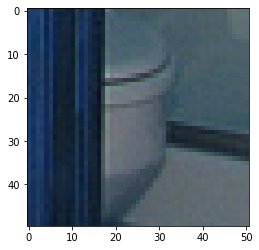

  0%|          | 0/5805 [00:00<?, ?it/s]

(50, 48, 3)


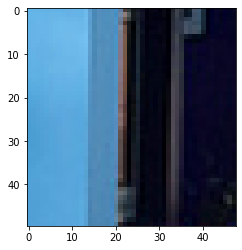

  0%|          | 0/4970 [00:00<?, ?it/s]

(50, 52, 3)


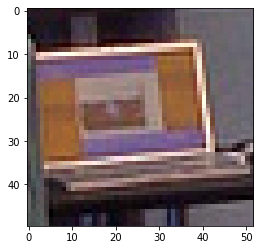

  0%|          | 0/2262 [00:00<?, ?it/s]

(50, 50, 3)


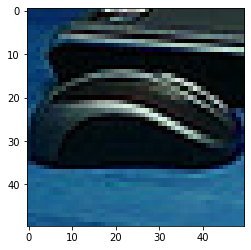

  0%|          | 0/5703 [00:00<?, ?it/s]

(50, 51, 3)


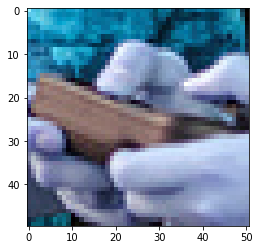

 15%|█▍        | 421/2855 [00:00<00:03, 703.74it/s]

(50, 50, 3)


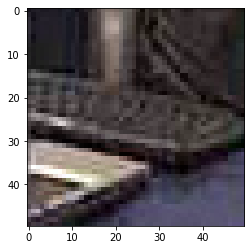

  0%|          | 0/6434 [00:00<?, ?it/s]

(50, 50, 3)


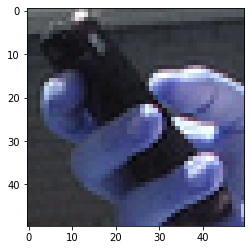

  7%|▋         | 117/1673 [00:00<00:01, 1122.42it/s]

(50, 48, 3)


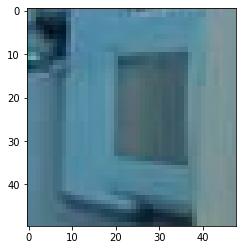

 27%|██▋       | 886/3334 [00:01<00:03, 648.70it/s]

(50, 51, 3)


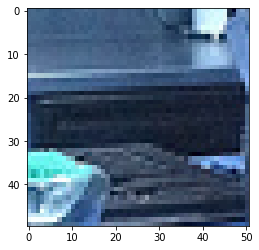

  0%|          | 0/9973 [00:00<?, ?it/s]

(50, 49, 3)


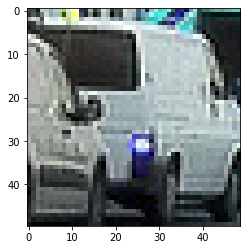

  0%|          | 0/225 [00:00<?, ?it/s]

(50, 49, 3)


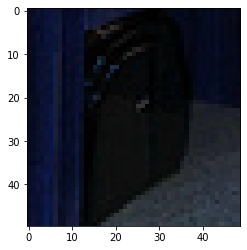

  0%|          | 0/5610 [00:00<?, ?it/s]

(50, 52, 3)


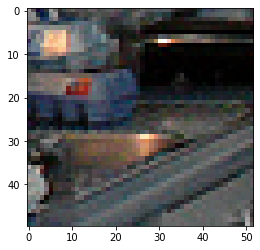

 17%|█▋        | 445/2637 [00:01<00:05, 426.41it/s]

(50, 51, 3)


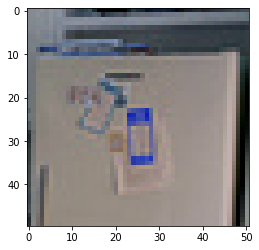

  0%|          | 0/24715 [00:00<?, ?it/s]

(50, 48, 3)


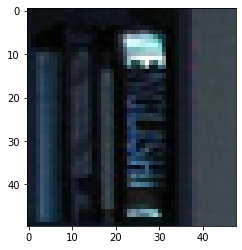

  0%|          | 0/6334 [00:00<?, ?it/s]

(50, 49, 3)


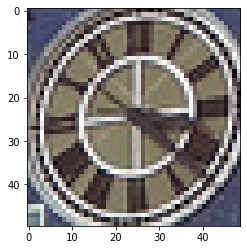

  0%|          | 0/6613 [00:00<?, ?it/s]

(50, 48, 3)


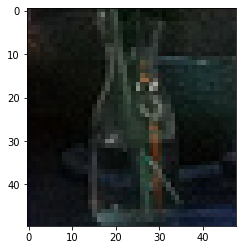

  0%|          | 0/1481 [00:00<?, ?it/s]

(50, 50, 3)


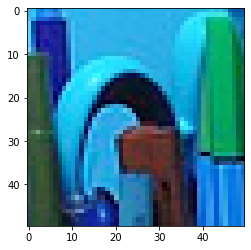

  1%|▏         | 61/4793 [00:00<00:07, 606.00it/s]

(50, 51, 3)


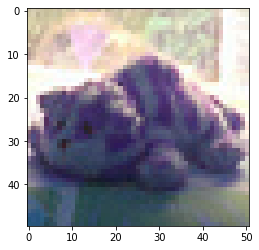

  0%|          | 0/198 [00:00<?, ?it/s]

(50, 50, 3)


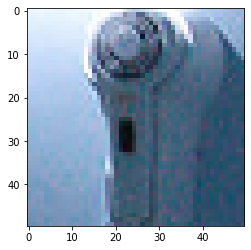

  0%|          | 0/10759 [00:00<?, ?it/s]

(50, 49, 3)


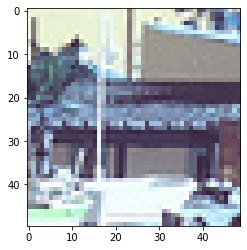

  0%|          | 0/1954 [00:00<?, ?it/s]

(50, 49, 3)


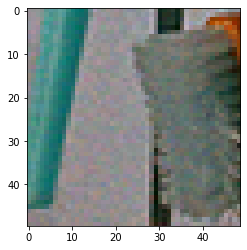

  0%|          | 0/1954 [00:00<?, ?it/s]


In [13]:
import cv2
from tqdm import tqdm

path = "cropped_coco/train/100"

for class_dir in file_list:
    img_list = os.listdir(os.path.join(path,class_dir))
    for img_file in tqdm(img_list):
        img = cv2.imread(os.path.join(path,class_dir,img_file))
        if img.shape[0] == 50:
            print(img.shape)
            plt.imshow(img)
            plt.show()
            
            break


In [14]:
import cv2
from tqdm import tqdm

path = "cropped_coco/train/100"

num = 0
total = 0
for class_dir in file_list:
    img_list = os.listdir(os.path.join(path,class_dir))
    if len(img_list)>5000:
        num = num + 1
        total += len(img_list)
print(num)
print(total)

54
785011


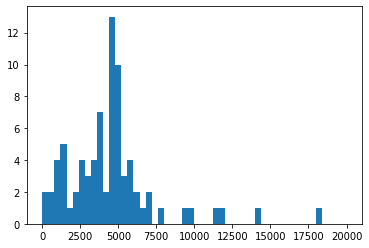

6850.025


In [15]:
temp = []
for i in range(len(img_mean_arr)):
    temp.append(len(np.array(img_mean_arr[i])[np.array(img_mean_arr[i])>50]))

plt.hist(temp,bins=50,range=(0,20000))
plt.show()
print(np.array(temp).mean())

In [48]:
img_size = 50
num_of_img = 3000

remain_classes = 0

for i in img_mean_arr:
    dims = np.array(i)
    dims.sort()
    if len(dims[dims>img_size]) > num_of_img:
        remain_classes += 1 
    else:
        print(len(dims[dims>img_size]))

print('remain:',remain_classes,'over:',len(img_mean_arr))


2954
1428
1293
709
1252
1391
1920
618
2438
945
2281
886
2024
2578
2794
1460
150
2621
2832
1117
140
1081
remain: 58 over: 80


In [5]:
import cv2
from tqdm import tqdm
import shutil
import os
import numpy as np

path = "cropped_coco/train/100"
new_path = "sampled_cropped_coco/train"

file_list = os.listdir(path)

img_min = 50
img_num = 3000

for class_dir in file_list:
    img_list = os.listdir(os.path.join(path,class_dir))
    img_list_over_50 = []
    for img_file in tqdm(img_list):
        img = cv2.imread(os.path.join(path,class_dir,img_file))
        if img.shape[0] > img_min:
            img_list_over_50.append(img_file)
    if len(img_list_over_50)>img_num:
        os.mkdir(os.path.join(new_path,'100',class_dir))
        os.mkdir(os.path.join(new_path,'50',class_dir))
        chosen = np.random.choice(img_list_over_50,img_num ,replace=False)
        for chosen_one in tqdm(chosen):
            shutil.copy(os.path.join(path,class_dir,chosen_one),os.path.join(new_path,'100',class_dir))
            shutil.copy(os.path.join('cropped_coco/train/50',class_dir,chosen_one),os.path.join(new_path,'50',class_dir))
    

100%|██████████| 3000/3000 [00:06<00:00, 465.97it/s]


In [9]:
shutil.copytree(os.path.join('cropped_coco','val'),'sampled_cropped_coco/val')

'sampled_cropped_coco/val'

In [19]:
val_path = 'sampled_cropped_coco/val'

class_dirs = os.listdir('sampled_cropped_coco/train/100')
val_dirs = os.listdir(os.path.join(val_path))
for val_dir in val_dirs:
    for val_sized_dir in os.listdir(os.path.join(val_path,val_dir)):
        if val_sized_dir in class_dirs:
            print(val_sized_dir,'true')
        else:
            print(val_sized_dir,'false')
            shutil.rmtree(os.path.join(val_path,val_dir,val_sized_dir))

24 true
51 true
72 true
84 true
79 true
23 false
67 true
64 true
5 true
88 true
4 true
2 true
44 true
31 true
34 false
35 true
6 true
18 true
52 true
62 true
74 false
33 true
36 false
50 true
57 true
76 false
70 true
59 true
86 true
7 true
39 false
43 true
56 true
10 false
80 false
27 true
42 true
87 false
41 true
63 true
22 true
81 true
65 true
90 false
55 true
17 true
15 true
14 false
28 true
20 true
75 false
82 false
77 false
47 true
9 true
58 false
19 true
85 false
13 false
73 true
60 true
40 false
48 true
61 true
78 false
25 true
37 false
46 true
54 true
89 false
53 true
1 true
11 false
8 true
21 true
32 true
38 true
49 true
16 true
3 true
24 true
51 true
72 true
84 true
79 true
23 false
67 true
64 true
5 true
88 true
4 true
2 true
44 true
31 true
34 false
35 true
6 true
18 true
52 true
62 true
74 false
33 true
36 false
50 true
57 true
76 false
70 true
59 true
86 true
7 true
39 false
43 true
56 true
10 false
80 false
27 true
42 true
87 false
41 true
63 true
22 true
81 true
65 true

In [11]:
print(class_dirs)

['24', '51', '72', '84', '79', '67', '64', '5', '88', '4', '2', '44', '31', '35', '6', '18', '52', '62', '33', '50', '57', '70', '59', '86', '7', '43', '56', '27', '42', '41', '63', '22', '81', '65', '55', '17', '15', '28', '20', '47', '9', '19', '73', '60', '48', '61', '25', '46', '54', '53', '1', '8', '21', '32', '38', '49', '16', '3']


In [12]:
print(val_dirs)

['50', '70', '100', '10', '80', '30', '90', '20', '60', '40']


In [8]:
sum(1 for x in os.walk("sampled_cropped_coco"))

711

In [1]:
import os
import cv2

def temp_multip(input_dir):
    root,dirs,files = input_dir
    for file in files:
        if file.endswith(".png"):
            src = cv2.imread(os.path.join(root, file),cv2.IMREAD_COLOR)
            if src.shape[0]>224:
                dst = cv2.resize(src,dsize=(224,224),interpolation=cv2.INTER_AREA)
                cv2.imwrite(os.path.join(root, file),dst)

In [2]:
import os
import cv2

from multiprocessing import Pool
from tqdm import tqdm
import numpy as np

with Pool(processes=40) as p:
    with tqdm(total=sum(1 for x in os.walk("sampled_cropped_coco"))) as pbar:
        for i,_ in enumerate(p.imap_unordered(temp_multip,os.walk("sampled_cropped_coco"))):
            pbar.update()

100%|██████████| 711/711 [06:16<00:00,  1.89it/s] 
